---

_© Mohammad M. Ajallooeian, All Rights Reserved._

This notebook was created for educational purposes and parts of it is the intellectual property of Mohammad M. Ajallooeian. Generative AI tools, including but not limited to ChatGPT, DALL·E, Midjourney, and Gemini, may have been utilized in the creation of this notebook to generate content, visualizations, or other elements. All content generated has been verified and edited to ensure accuracy and educational value. Unauthorized reproduction or distribution of this material is prohibited without prior written permission from the author.

---

# CMPT 3520 Machine Learning II Course Project: Counting and Detecting LEGO Pieces

## Phase 1: Classical Computer Vision Techniques for LEGO Piece Counting

### 1.1 Introduction and Overview of Image Segmentation

#### Background

In this project, you'll explore traditional computer vision techniques to detect and classify LEGO pieces based on color and shape. [Image segmentation](https://en.wikipedia.org/wiki/Image_segmentation) is a fundamental technique in computer vision that divides an image into meaningful segments, making it easier to analyze and understand. We will start with an overview of segmentation methods and how they can be applied to images of LEGO pieces.

<img src='https://drive.google.com/uc?id=1hoLExpZ8jPBfbxlNEqe4xYEAPukLGA6z' width="1000">

[Photo](https://www.flickr.com/photos/195664105@N04/52082513197) by Kotwel Inc. [CC BY 2.0](https://creativecommons.org/licenses/by/2.0/)


#### Objective

Your task is to experiment with three segmentation techniques and determine which one is best suited for this project. By the end of this section, you should have a clear understanding of how these techniques work and be prepared to apply them to the LEGO dataset provided.

##### Segmentation Techniques Overview

We will explore the following three segmentation methods:
1. **Thresholding**: This method uses a threshold value to convert an image to a binary form, separating the object from the background.
2. **Edge Detection**: This technique identifies edges within the image, helping to outline the shapes of the LEGO pieces.
3. **Color-Based Segmentation**: Unlike the previous two, this method uses color information to segment the image based on different color regions.

Each technique has its strengths and limitations, which we will explore in this project.

**What to do**:

1. Read through the overview of the three segmentation techniques.
2. Try to think about how each technique might apply to counting and classifying LEGO pieces.
3. Feel free to look up additional information on each method if you’re curious!
Before we begin, let's talk about a package we will use: OpenCV.

### Data
Before we get started, let's talk about the data we will be using for this phase of the project. For the first phase of the project, you will be working with a set of images of lego pieces located [here](https://photos.google.com/share/AF1QipPJmj17ZeMqKIVm06ZEKDP9BL2oAj0NeHLojGNoXcHGWKki_Hf3JbLpbMkOd6Da2w?key=ZU1NNjk2Sl9QMW4zQXN3bTNCV2FIMDVLOXNjMTlB).

- Download the images and put all of them in a folder called `Photos` within the folder you have your project file in. You can download all of the images by using the 'Download all' option under the three dots in the upper right corner. This will give you a compressed zip file which you can expand to get the images.
- You should **save a copy of this file on your own Drive and replace `Student` in parentheses in the name of this notebook with names of members of your team** before doing anything else. Google Drive (and Colab) will not allow you to save over this file and any changes you make will be lost.
- For this notebook to work correctly on your own Drive, also downlaod [this file](https://drive.google.com/file/d/1Q1qV2M1vsd3QsrzxbZgq-cv7luqoEd0j/view?usp=sharing) and put it in the same directory the notebook is. Your folder should look similar to this:
<img src='https://drive.google.com/uc?id=1oFwbAIR7GQcIgjPdriGMKGrcRjqmede9'>
Here, the Photos folder contains 33 image files.
- Provide access permission to Colab to be able to access your Google Drive.
- Modify the path below to reflect where the directory in which you have your copy of the project notebook file (this file) is:


In [ ]:
root_path = '/content/drive/MyDrive/Colab Notebooks/CMPUT 3520 F24/Project'

Now, we can start talking about a tool you can use for computer vision tasks.

---

### Introduction to OpenCV

In this project, you have the flexibility to choose whichever computer vision library or package you prefer. However, we recommend **OpenCV** as a reliable and well-supported option, especially for classical image processing and computer vision tasks.

#### What is OpenCV?

OpenCV (Open Source Computer Vision Library) is a popular open-source library that provides a comprehensive set of tools and algorithms for computer vision and image processing. OpenCV supports a wide range of programming languages, including Python, C++, Java, and MATLAB, and is highly efficient for real-time image and video processing.

With OpenCV, you can accomplish tasks such as:
- **Image Processing**: Reading, writing, and manipulating images.
- **Feature Detection and Matching**: Identifying key points in images and matching them across different images.
- **Object Detection and Recognition**: Locating objects within images or videos using techniques like face detection.
- **Video Analysis**: Working with video files and live streams to perform motion tracking, background subtraction, and more.

OpenCV is widely used in industry and academia due to its versatility, efficiency, and extensive documentation.


#### Basic Examples of Computer Vision Tasks with OpenCV

In [ ]:
# Import necessary libraries
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

To get a sense of how OpenCV works, here are some basic tasks that it can handle:

1. **Reading and Displaying an Image**:
   - OpenCV can load an image from a file, process it, and display it.

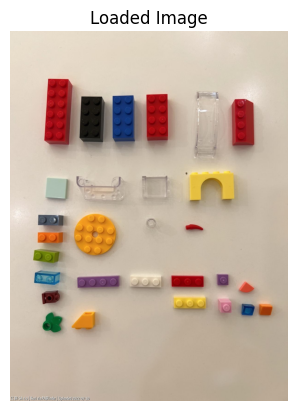

In [ ]:
# Load an image from file
image = cv.imread(root_path + '/lego_image.jpg')

def show_color_image(image, title, show=True):

    # Convert the image from BGR to RGB color space
    # OpenCV loads images in BGR format by default, while Matplotlib expects RGB format.
    image_rgb = cv.cvtColor(image, cv.COLOR_BGR2RGB)

    # Display the image
    plt.imshow(image_rgb)

    # Set the title of the displayed image
    plt.title(title)

    # Remove the axis ticks and labels for a cleaner view of the image
    plt.axis('off')

    # Display the image with the above configurations
    if show:
        plt.show()

show_color_image(image, "Loaded Image")

[Photo ](https://www.pabfinder.com/stores/fr/paris-les-halles/photos/afbcff31-1693-4fab-9ff7-5d317f6912c2) by Kuri [CC BY-SA 4.0](https://creativecommons.org/licenses/by-sa/4.0/)


2. **Resizing and Cropping an Image**:
   - OpenCV provides easy methods to resize and crop images, allowing you to adjust image dimensions as needed.

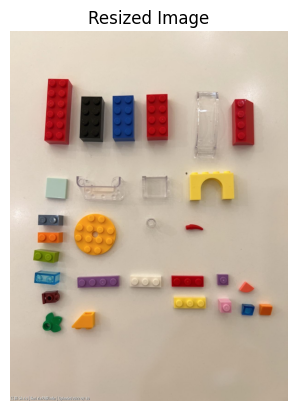

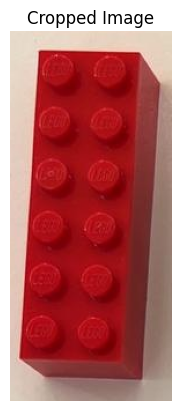

In [ ]:
# Resize the image to half its original size
resized_image = cv.resize(image, (0, 0), fx=0.5, fy=0.5)
show_color_image(resized_image, "Resized Image")


# Crop a region of interest (ROI) from the image
cropped_image = image[190:510, 140:280]  # Define a rectangular area to crop
show_color_image(cropped_image, "Cropped Image")

3. **Applying a Gaussian Blur**:
   - Blurring is commonly used to reduce noise before further processing.

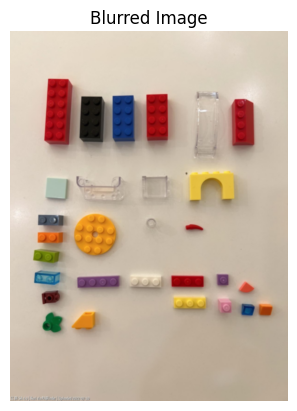

In [ ]:
# Apply Gaussian Blur to the image
blurred_image = cv.GaussianBlur(image, (7, 7), 1.5)
show_color_image(blurred_image, "Blurred Image")

4. **Edge Detection with the Canny Edge Detector**:
   - OpenCV’s Canny Edge Detector is a popular tool for detecting the edges of objects within an image.

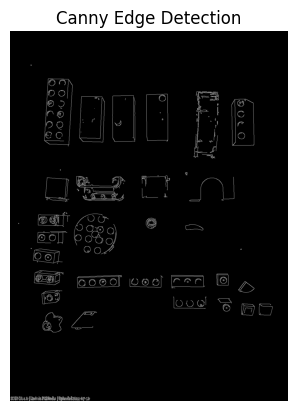

In [ ]:
# Convert to grayscale
gray_image = cv.cvtColor(image, cv.COLOR_BGR2GRAY)

# Apply Canny Edge Detection
edges = cv.Canny(gray_image, 50, 150)

def show_gray_image(image, title, show=True):
    plt.imshow(image, cmap='gray')
    plt.title(title)
    plt.axis('off')
    if show:
        plt.show()

# Display the edge-detected image
show_gray_image(edges, "Canny Edge Detection")

#### Why Choose OpenCV?

OpenCV is recommended for this project because it provides robust tools for both traditional and advanced computer vision tasks. Its extensive functionality and optimized performance make it ideal for real-time applications. Additionally, OpenCV has a large user community, which means there are plenty of tutorials, guides, and resources to help you along the way.

Feel free to explore OpenCV or any other library you are comfortable with. OpenCV, however, can serve as a great option for tackling the LEGO piece counting tasks in this project.

---

If you need further information about computer vision take a look at [Computer Vision: Algorithms and Applications, 2nd ed. by Richard Szeliski](https://szeliski.org/Book/).

---


Now, let's move on to exploring the first segmentation technique: thresholding.

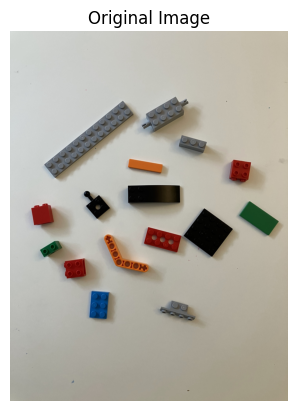

In [ ]:
image = cv.imread(root_path + '/Photos/IMG_0292.jpg')

show_color_image(image, "Original Image")

### 1.2 Applying Thresholding for Image Segmentation

#### Overview of Thresholding

Thresholding is a simple yet powerful technique for segmenting an image based on pixel intensity. It converts an image to a binary form, where pixels above a certain threshold are set to one value (white), and those below are set to another (black). This makes it easier to distinguish objects from the background.

#### Types of Thresholding

1. **Global Thresholding**: Applies a single threshold value across the entire image.
2. **Adaptive Thresholding**: Calculates a different threshold for smaller regions of the image, useful when the lighting varies across the image.

In this section, we will implement both types of thresholding and experiment with different parameters to find the most effective settings for the LEGO images.

---

### Instructions for This Section

1. **Implement Global and Adaptive Thresholding**:
   - Use OpenCV’s `cv.threshold()` for global thresholding.
   - Use `cv.adaptiveThreshold()` for adaptive thresholding.
   - [Documentation](https://docs.opencv.org/4.x/d7/d4d/tutorial_py_thresholding.html)
2. **Experiment with Parameters**:
   - For global thresholding, try different values and find an optimal threshold.
   - For adaptive thresholding, test different block sizes and `C` values (constant subtracted from the mean).
3. **Visualize and Analyze Results**:
   - Plot the original image and the thresholded images side by side.
   - Analyze how well each method segments the LEGO pieces from the background.

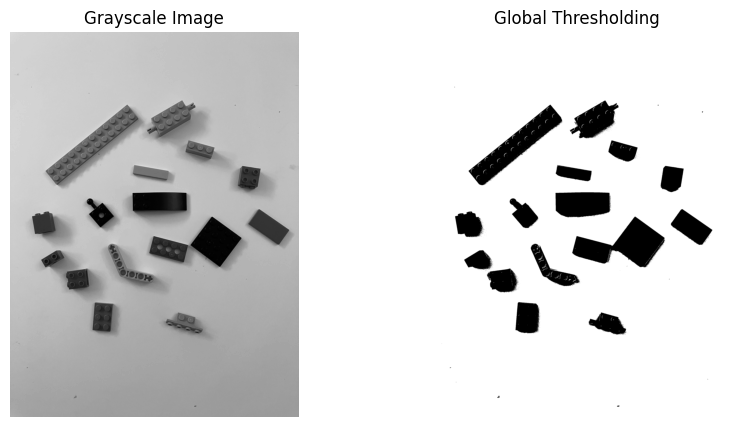

In [ ]:
# Global Thresholding Example
# Convert the image to grayscale
gray_image = cv.cvtColor(image, cv.COLOR_BGR2GRAY)

# Apply global thresholding
_, global_thresh = cv.threshold(gray_image, 127, 255, cv.THRESH_BINARY)

# Display the result
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
show_gray_image(gray_image, "Grayscale Image", show=False)

plt.subplot(1, 2, 2)
show_gray_image(global_thresh, "Global Thresholding", show=True)

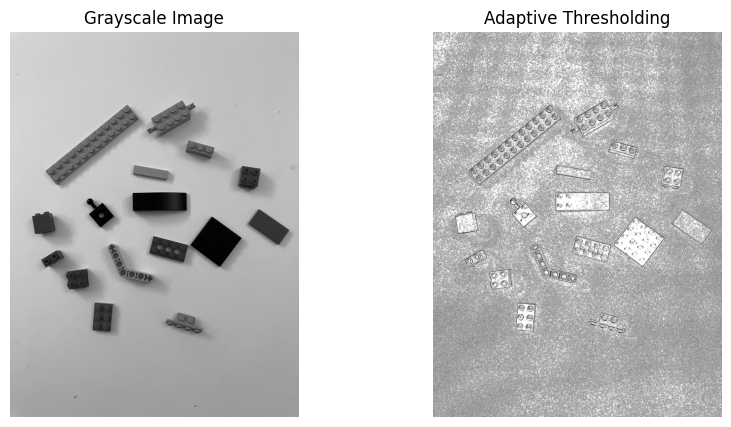

In [ ]:
# Adaptive Thresholding Example
# Apply adaptive thresholding
adaptive_thresh = cv.adaptiveThreshold(
    gray_image, 255, cv.ADAPTIVE_THRESH_GAUSSIAN_C,
    cv.THRESH_BINARY, 11, 2
)

# Display the result
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
show_gray_image(gray_image, "Grayscale Image", show=False)

plt.subplot(1, 2, 2)
show_gray_image(adaptive_thresh, "Adaptive Thresholding", show=True)

### 1.3 Applying Edge Detection for Image Segmentation

#### Overview of Edge Detection

Edge detection is a technique used to identify the boundaries of objects within an image. By detecting edges, we can outline the shapes of LEGO pieces and differentiate them from the background. One popular edge detection algorithm is the **Canny Edge Detector**, which we will use in this section.

#### How the Canny Edge Detector Works

The Canny Edge Detector is a multi-step algorithm that involves:
1. **Noise Reduction**: Blurring the image to reduce noise and prevent false edge detection.
2. **Gradient Calculation**: Calculating the intensity gradients of the image to detect areas of rapid intensity change.
3. **Non-Maximum Suppression**: Thinning the edges to ensure only the strongest edges are kept.
4. **Edge Tracking by Hysteresis**: Using two threshold values to identify and connect edge pixels, ensuring clean edge lines.

By the end of this section, you will be able to apply the Canny Edge Detector to segment LEGO pieces based on their outlines.

---

### Instructions for This Section

1. **Implement Canny Edge Detection**:
   - Use OpenCV’s `cv.Canny()` function to detect edges in the grayscale image.
   - Experiment with different threshold values to find settings that highlight the LEGO pieces effectively.
   - [Documentation](https://docs.opencv.org/4.x/da/d22/tutorial_py_canny.html)
2. **Visualize and Analyze Results**:
   - Plot the original grayscale image alongside the edge-detected image to compare.
   - Evaluate how well the detected edges represent the shapes of the LEGO pieces.

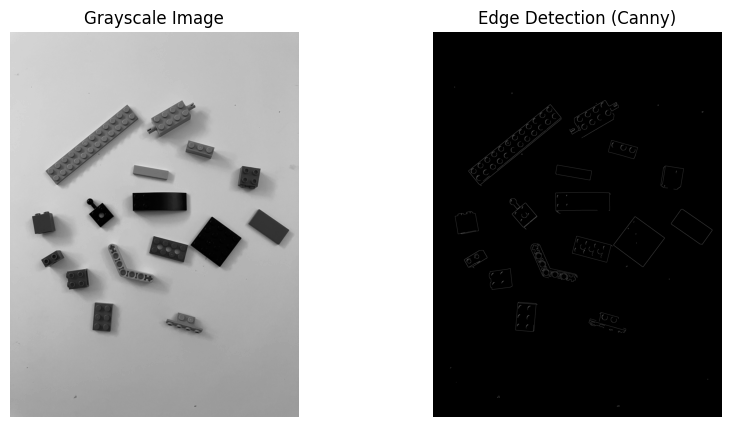

In [ ]:
# Apply Gaussian Blur to reduce noise before edge detection
blurred_image = cv.GaussianBlur(gray_image, (5, 5), 1.4)

# Apply Canny Edge Detection
# Adjust the threshold values as needed to highlight the LEGO pieces
edges = cv.Canny(blurred_image, 50, 150)

# Display the original grayscale image and the edge-detected image
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(gray_image, cmap='gray')
plt.title("Grayscale Image")
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(edges, cmap='gray')
plt.title("Edge Detection (Canny)")
plt.axis('off')

plt.show()

### 1.4 Applying Color-Based Segmentation for Image Segmentation

#### Overview of Color-Based Segmentation

Unlike thresholding and edge detection, which often rely on grayscale images, color-based segmentation uses color information to distinguish different regions. This can be especially effective when objects (like LEGO pieces) have distinct colors.

#### Introduction to RG Chromaticity

One method of color-based segmentation is **RG Chromaticity**, which uses normalized color components to reduce the impact of lighting variations. The RG Chromaticity transformation calculates normalized red and green components while discarding the blue channel.

The RG Chromaticity values can be calculated as:
- $ r = \frac{R}{R + G + B} $
- $ g = \frac{G}{R + G + B} $

By focusing on these normalized values, we can effectively segment objects based on color despite differences in lighting.

#### Color-Based Segmentation as a Region-Based Technique

Color-based segmentation is a type of **region-based segmentation**. In region-based segmentation, the objective is to group pixels into regions based on shared characteristics, such as color, texture, or intensity. For color-based segmentation, regions are formed based on similarities in color, making it particularly useful for images where objects are easily distinguishable by color. By leveraging color as the primary characteristic, this method segments regions in a way that is less sensitive to lighting conditions, as exemplified by RG Chromaticity, which normalizes color values to enhance accuracy.

---

### Instructions for This Section

1. **Convert the Image to RG Chromaticity**:
   - Calculate the normalized red and green channels as described.
   - Create a new image using these two channels for color segmentation.
2. **Apply Thresholding on Chromaticity Image**:
   - Use thresholding or clustering (such as k-means) on the RG chromaticity channels to identify distinct color regions.
3. **Visualize and Analyze Results**:
   - Plot the RG Chromaticity image and the segmented image to observe how well the LEGO pieces are separated by color.
   - Analyze the effectiveness of this method compared to the previous segmentation techniques.

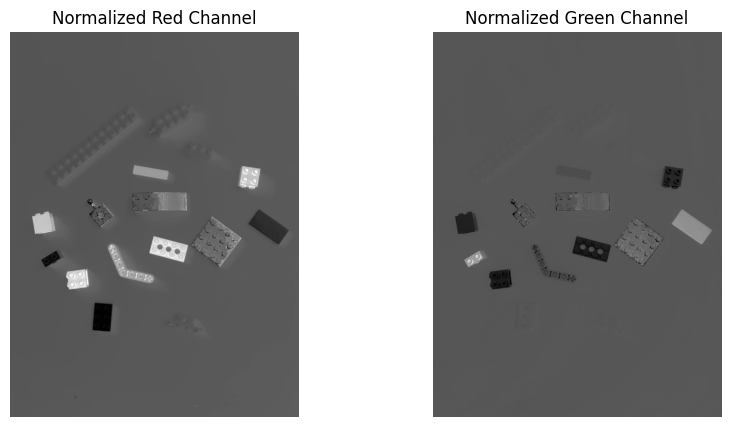

In [ ]:
# Convert the image to float type for accurate calculations
image_float = image.astype(float)

# Separate the color channels
R = image_float[:, :, 2]
G = image_float[:, :, 1]
B = image_float[:, :, 0]

# Calculate RG Chromaticity
sum_channels = R + G + B + 1e-6  # Add a small value to avoid division by zero
r = R / sum_channels
g = G / sum_channels

# Display the RG Chromaticity image
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
show_gray_image(r, "Normalized Red Channel", show=False)

plt.subplot(1, 2, 2)
show_gray_image(g, "Normalized Green Channel", show=True)

plt.show()

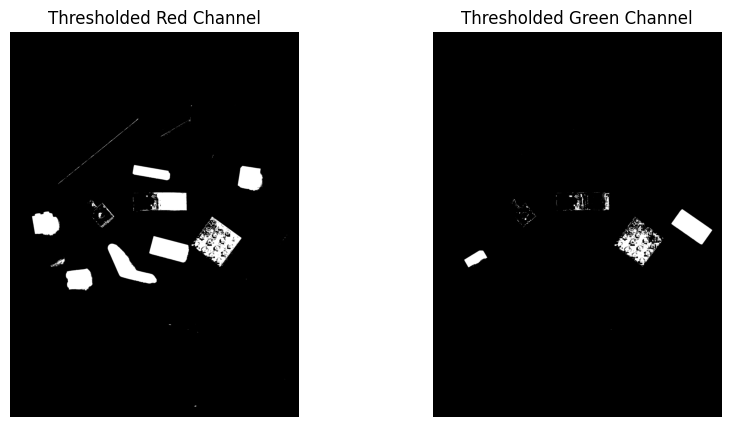

In [ ]:
# Apply Thresholding on RG Chromaticity Channels
# Example: Threshold the normalized red channel to isolate red LEGO pieces
_, red_thresh = cv.threshold((r * 255).astype(np.uint8), 100, 255, cv.THRESH_BINARY)
_, green_thresh = cv.threshold((g * 255).astype(np.uint8), 100, 255, cv.THRESH_BINARY)

# Display the thresholded red and green channels
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
show_gray_image(red_thresh, "Thresholded Red Channel", show=False)

plt.subplot(1, 2, 2)
show_gray_image(green_thresh, "Thresholded Green Channel", show=True)

plt.show()

### 1.5 Putting Everything Together

#### Systematic Thresholding Using Histograms

A systematic approach to selecting a threshold for segmentation involves using histograms, which can help visualize the distribution of pixel values. This can be applied to any method that relies on thresholding. By examining histograms, we can make more informed choices rather than guessing thresholds blindly.

**Instructions**:

1. **Explore Histograms**:
   - For each segmentation method that involves thresholding, calculate and plot the histogram of the relevant pixel values.
   - Use these histograms to determine a suitable threshold for each method systematically.

2. **Automated Threshold Detection**:
   - Instead of manually selecting thresholds, implement a method to automatically detect suitable thresholds, such as Otsu’s method. This will further enhance the systematic approach across different segmentation techniques.

#### Image Pre-Processing for Enhanced Segmentation

Pre-processing images is a common step before applying segmentation, as it can improve the quality of the segmentation results. Various techniques, such as histogram equalization, white balancing, and contrast enhancement, can help enhance the image by improving contrast, balancing lighting, and correcting color biases.

**Instructions**:

1. **Image Pre-Processing Techniques**:
   - Apply **histogram equalization** to enhance contrast. Refer to [OpenCV’s histogram equalization tutorial](https://docs.opencv.org/4.x/d5/daf/tutorial_py_histogram_equalization.html) for guidance.
   - Try **white balancing** to adjust the color balance and lighting of the image. Check [this guide on white balancing](https://jmanansala.medium.com/image-processing-with-python-color-correction-using-white-balancing-6c6c749886de) for more information.
   - Use **contrast enhancement** to further highlight details. You can learn more about enhancing contrast from [this resource](https://docs.opencv.org/3.4/d3/dc1/tutorial_basic_linear_transform.html).

2. **Systematic Exploration of Pre-Processing**:
   - Test each of these pre-processing methods before applying segmentation.
   - Compare and analyze the effects of each method, noting which leads to the most effective segmentation.

3. **Contour Detection**:
   - After thresholding, apply contour detection to identify distinct LEGO pieces in the image. You can use the [OpenCV contour detection guide](https://docs.opencv.org/3.4/d3/d05/tutorial_py_table_of_contents_contours.html).
   - Display the detected contours overlaid on the original color image. For visibility, use **bright yellow** to plot the contours.

4. **Filtering Incorrect Contours**:
   - Examine the contours to identify any that don’t correspond to LEGO pieces (e.g., very small or very large contours). These can be filtered based on contour size.
   - Tip: Use the contour area (there is a function contourArea() that does that) comparative to picture size to decide whether to keep or discard each contour.

5. **Counting the Contours**:
   - After filtering, count the valid contours to estimate the number of LEGO pieces in the image.

---

### Deliverables for This Phase:

- **Explanation and Analysis**: Describe your process for choosing thresholds systematically, using histograms across different segmentation methods. Compare various pre-processing techniques and their effectiveness.
- **Visualizations**: Provide histograms, pre-processed images, and overlayed contours on the color image for each approach.
- **Contour Detection and Filtering**: Report the detected contours, explain which were filtered out, and include the final count of LEGO pieces.

---

### Rubric (70 Marks Total)

- **Histogram-Based Thresholding and Edge Detection Parameters (20 Marks)**:
  - Proper calculation and visualization of histograms for each method (10 marks)
  - Explanation of good thresholds and parameters for edge detection based on histograms and method-specific analysis (10 marks)

- **Automated Threshold Detection (10 Bonus Marks)**:
  - Implementation of automated threshold detection (5 bonus marks)
  - Analysis of the effectiveness compared to manual thresholding (5 bonus marks)

- **Pre-Processing Techniques (20 Marks)**:
  - Application of histogram equalization, white balancing, and contrast enhancement (5 marks each for successful implementation)
  - Comparative analysis of pre-processing methods (5 marks)

- **Contour Detection and Visualization (15 Marks)**:
  - Accurate contour detection and overlay on color image (15 marks)

- **Filtering Incorrect Contours (10 Marks)**:
  - Effective filtering of contours based on contour size (10 marks)

- **Counting Contours (5 Marks)**:
  - Accurate counting of contours, with explanations for any filtered contours (3 marks)

| Criteria                                            | Excellent (Full Marks)                                          | Good (Partial Marks)                                        | Needs Improvement (Few or No Marks)               |
|-----------------------------------------------------|-----------------------------------------------------------------|-------------------------------------------------------------|---------------------------------------------------|
| **Thresholding and Edge Detection Parameters**      | Provides accurate histograms for each method and thoroughly explains thresholds and parameters for edge detection based on histogram analysis. (10 Marks) | Histograms, thresholds, and edge detection parameters are mostly accurate, with minor omissions or inaccuracies. (5-9 Marks) | Inaccurate histograms or insufficient explanation of thresholds and edge detection parameters. (0-4 Marks) |
| **Automated Threshold Detection (Bonus)**           | Implements automated detection effectively and provides a detailed analysis compared to manual methods. (10 Bonus Marks) | Implementation is partially correct or lacks thorough comparison to manual methods. (5-9 Bonus Marks) | Incorrect implementation or missing analysis. (0-4 Bonus Marks)             |
| **Pre-Processing Techniques**                       | Successfully applies histogram equalization, white balancing, and contrast enhancement with a detailed comparative analysis. (12 Marks) | Applies pre-processing techniques with some minor inaccuracies or lacks detailed analysis. (6-11 Marks) | Incorrect or incomplete application of techniques with little to no analysis. (0-5 Marks) |
| **Contour Detection and Visualization**             | Accurately detects and overlays contours, using correct visualization techniques. (10 Marks) | Detects contours with some minor errors, or visualization lacks clarity. (5-9 Marks) | Incorrect contour detection or poor visualization. (0-4 Marks)             |
| **Filtering Incorrect Contours**                    | Effectively filters contours based on size, with appropriate reasoning. (5 Marks)           | Partially filters contours, with minor errors or insufficient reasoning. (3-4 Marks) | Incorrect or no filtering of contours, lacks justification. (0-2 Marks)     |
| **Counting Contours**                               | Accurately counts contours and provides clear explanation for filtered contours. (3 Marks)  | Counts contours with minor errors, or explanation is incomplete. (2 Marks) | Incorrect contour count or lacks explanation for filtering. (0-1 Mark)      |

*Note: The automated threshold detection is a bonus component, with an opportunity to earn up to an additional 10 marks.*

---

In [ ]:
### Your code goes here.

---

## Phase 2: Deep Learning for Object Detection of LEGO Pieces

### 2.1 Introduction to Object Detection and Dataset Preparation

#### Overview of Object Detection

In this phase, we will use deep learning to detect LEGO pieces in images. Object detection involves identifying and localizing objects within an image, often by drawing bounding boxes around them. For this project, we will focus on detecting and counting LEGO pieces without differentiating them by color or type.

#### Object Detection Frameworks

Several popular frameworks are available for object detection, including:
- **YOLO (You Only Look Once)**: A real-time object detection framework.
- **SSD (Single Shot MultiBox Detector)**: Fast and efficient, suitable for applications requiring real-time processing.
- **Mask R-CNN**: A versatile framework that provides bounding boxes and segmentation masks, though it is slower than YOLO and SSD.

For this project, you may choose any framework, but we’ll provide starter code using **YOLO** for simplicity and speed.

Here is a [tutorial about object detection and finetuning with PyTorch using Mask R-CNN](https://pytorch.org/tutorials/intermediate/torchvision_tutorial.html)

#### Dataset Preparation

To train a deep learning model, we need a large dataset. In this project, you’ll use a [dataset with annotated images of LEGO pieces](https://www.kaggle.com/datasets/dreamfactor/biggest-lego-dataset-600-parts). The dataset will need to be split into three parts:
- **Training Set (70%)**: Used to train the model.
- **Validation Set (15%)**: Used to fine-tune hyperparameters and avoid overfitting.
- **Test Set (15%)**: Used to evaluate the model’s performance.

In the following steps, you will:
1. Download and prepare the dataset.
2. Divide the dataset into training, validation, and test sets.
3. Explore the dataset and inspect a few samples to ensure proper annotations.

**Note**: The images are synthetic, and the annotations follow the [PASCAL VOC](http://host.robots.ox.ac.uk/pascal/VOC/) format. These are a lot of images! You probably do not need all of them. Feel free to reduce your dataset.

In [1]:
# Import necessary libraries for dataset handling
from sklearn.model_selection import train_test_split

---

### Instructions for This Section

1. **Download and Load the Dataset**:
   - Ensure you have access to the dataset and load it using Python.
2. **Split the Dataset**:
   - Use Python’s libraries to split the dataset into training, validation, and test sets.
3. **Visualize Sample Images and Annotations**:
   - Display a few sample images with their bounding boxes to confirm the data is correctly loaded and annotated.

**Deliverables for this Section:**
- Documentation on dataset preparation, including the data split.
- Visualizations of sample images with annotations.

### **The objective** of this process is to prepare a reduced version of a large LEGO dataset for use in training machine learning models. The preparation involves downloading the dataset, organizing images and annotations, reducing the dataset size, extracting labels, confirming class distributions, and visualizing sample images to ensure data integrity.

In [1]:
!kaggle datasets download -d dreamfactor/biggest-lego-dataset-600-parts
!unzip biggest-lego-dataset-600-parts.zip -d lego_dataset

Streaming output truncated to the last 5000 lines.
  inflating: lego_dataset/dataset_20210629145407_top_600/images/f84e512c-db21-11eb-8a03-3497f683a169.jpg  
  inflating: lego_dataset/dataset_20210629145407_top_600/images/f84ebc1e-da70-11eb-a710-3497f683a169.jpg  
  inflating: lego_dataset/dataset_20210629145407_top_600/images/f84fcff4-e4e9-11eb-a725-b0c090bd3910.jpg  
  inflating: lego_dataset/dataset_20210629145407_top_600/images/f850070c-e302-11eb-ac4a-b0c090bd3910.jpg  
  inflating: lego_dataset/dataset_20210629145407_top_600/images/f8504924-e5bd-11eb-9c9e-b0c090bd3910.jpg  
  inflating: lego_dataset/dataset_20210629145407_top_600/images/f8507ef0-e5e1-11eb-b3b6-b0c090bd3910.jpg  
  inflating: lego_dataset/dataset_20210629145407_top_600/images/f8512b22-e471-11eb-89cd-b0c090bd3910.jpg  
  inflating: lego_dataset/dataset_20210629145407_top_600/images/f851375a-e4ac-11eb-abe5-b0c090bd3910.jpg  
  inflating: lego_dataset/dataset_20210629145407_top_600/images/f8519ebe-e7ad-11eb-af2c-b0c09

In [2]:
import os
print(os.listdir('/content/lego_dataset'))
print(os.listdir('/content'))

['dataset_20210629145407_top_600']
['.config', 'lego_dataset', 'biggest-lego-dataset-600-parts.zip', 'sample_data']


**NOTE:** To handle the dataset's large size, we reduced it to a target size (e.g., 5000 samples). This process involved:

Selecting random image-annotation pairs while ensuring each image had a corresponding annotation file.
Copying the selected files to new directories named reduced_images (for images) and reduced_annotations (for XML annotation files).

In [3]:
import os
import random
import shutil

def reduce_dataset(image_dir, annotation_dir, target_size):
    image_files = [f for f in os.listdir(image_dir) if os.path.isfile(os.path.join(image_dir, f))]
    annotation_files = [f for f in os.listdir(annotation_dir) if os.path.isfile(os.path.join(annotation_dir, f))]

    # Ensure image and annotation files have a one-to-one correspondence
    image_files = [f for f in image_files if f[:-4] + '.xml' in annotation_files]

    if len(image_files) < target_size:
        print("Warning: The dataset is smaller than the target size")
        target_size = len(image_files)

    selected_files = random.sample(image_files, target_size)

    # Create new directories for the reduced dataset
    reduced_image_dir = "reduced_images"
    reduced_annotation_dir = "reduced_annotations"
    os.makedirs(reduced_image_dir, exist_ok=True)
    os.makedirs(reduced_annotation_dir, exist_ok=True)

    for file in selected_files:
        # Copy images
        source_image_path = os.path.join(image_dir, file)
        destination_image_path = os.path.join(reduced_image_dir, file)
        shutil.copy2(source_image_path, destination_image_path)

        # Copy annotations
        annotation_file = file[:-4] + '.xml'
        source_annotation_path = os.path.join(annotation_dir, annotation_file)
        destination_annotation_path = os.path.join(reduced_annotation_dir, annotation_file)
        shutil.copy2(source_annotation_path, destination_annotation_path)

    print(f"Reduced dataset created with {target_size} images and annotations.")
    print(f"Images directory: {reduced_image_dir}")
    print(f"Annotations directory: {reduced_annotation_dir}")


image_directory = "/content/lego_dataset/dataset_20210629145407_top_600/images"
annotation_directory = "/content/lego_dataset/dataset_20210629145407_top_600/annotations"
reduce_dataset(image_directory, annotation_directory, 5000)

Reduced dataset created with 5000 images and annotations.
Images directory: reduced_images
Annotations directory: reduced_annotations


In [4]:
import os
import xml.etree.ElementTree as ET

def get_labels_and_classes(annotation_dir):
    labels = []
    classes = set()
    for filename in os.listdir(annotation_dir):
        if filename.endswith(".xml"):
            filepath = os.path.join(annotation_dir, filename)
            try:
                tree = ET.parse(filepath)
                root = tree.getroot()
                for obj in root.findall('object'):
                    label = obj.find('name').text
                    labels.append(label)
                    classes.add(label)
            except ET.ParseError as e:
                print(f"Error parsing {filename}: {e}")
    return labels, len(classes)

# Example usage
annotation_directory = "/content/reduced_annotations"  # Use the directory for reduced annotations
labels, num_classes = get_labels_and_classes(annotation_directory)

print("Labels of the reduced images:")
print(labels)  # Print all labels
print("\nTotal number of classes:", num_classes)

Labels of the reduced images:
['85861', '36841', '42023', '3701', '60485', '2476', '99008', '99021', '32028', '30136', '92099', '3298', '3045', '30565', '30031', '4006', '23443', '47905', '13564', '55013', '11211', '4871', '6112', '90540', '32606', '11946', '11214', '3659', '41678', '60849', '3020', '43719', '60602', '6180', '48729', '3021', '52501', '2736', '6060', '33183', '14719', '13965', '2921', '33299', '2447', '3707', '11253', '41678', '18671', '3829c01', '15462', '3873', '30153', '3034', '60485', '2420', '43719', '44294', '13971', '43093', '24246', '62462', '33909', '3685', '57895', '32016', '13564', '15392', '2540', '18853', '3036', '42610', '92582', '32316', '51739', '63868', '3830', '3297', '15208', '6180', '59349', '11946', '10928', '49668', '32072', '3245c', '98138', '6587', '15458', '10928', '3707', '6182', '15254', '60032', '35044', '4865', '32054', '32000', '43888', '3035', '14720', '96874', '22388', '32184', '56145', '30357', '4032', '18671', '4274', '57895', '35480', 

Next, we extracted object labels and counted the number of unique classes from the annotations. XML files were parsed to collect the name tag under each object section, and all labels were stored in a list. Unique class names were identified to determine the total number of object categories in the dataset.

*Key Results:*

A complete list of all labels in the dataset.

Total number of unique classes available.

In [9]:
import os
import torch
from torch.utils.data import Dataset, DataLoader, Subset
from sklearn.model_selection import train_test_split
from PIL import Image
import xml.etree.ElementTree as ET


# ObjectDetectionDataset definition remains the same
class ObjectDetectionDataset(Dataset):
    def __init__(self, image_dir, annotation_dir, transforms=None):
        self.image_dir = image_dir
        self.annotation_dir = annotation_dir
        self.transforms = transforms
        self.label_mapping = {}
        self.annotations = self.extract_annotations()

    def extract_annotations(self):
        data = []
        for annotation_file in os.listdir(self.annotation_dir):
            if annotation_file.endswith('.xml'):
                annotation_path = os.path.join(self.annotation_dir, annotation_file)
                tree = ET.parse(annotation_path)
                root = tree.getroot()

                image_name = root.find('filename').text
                image_path = os.path.join(self.image_dir, image_name)

                boxes = []
                labels = []
                for obj in root.findall('object'):
                    label = obj.find('name').text
                    if label in self.label_mapping:
                        label_idx = self.label_mapping[label]
                    else:
                        label_idx = len(self.label_mapping)
                        self.label_mapping[label] = label_idx

                    bndbox = obj.find('bndbox')
                    xmin = int(bndbox.find('xmin').text)
                    ymin = int(bndbox.find('ymin').text)
                    xmax = int(bndbox.find('xmax').text)
                    ymax = int(bndbox.find('ymax').text)

                    boxes.append([xmin, ymin, xmax, ymax])
                    labels.append(label_idx)

                if not labels:
                    continue

                boxes_tensor = torch.tensor(boxes, dtype=torch.float32)
                labels_tensor = torch.tensor(labels, dtype=torch.int64)

                target = {'boxes': boxes_tensor, 'labels': labels_tensor}
                data.append({'image_path': image_path, 'target': target})

        return data

    def __len__(self):
        return len(self.annotations)

    def __getitem__(self, idx):
        sample = self.annotations[idx]
        image_path = sample['image_path']
        target = sample['target']
        image = Image.open(image_path).convert("RGB")
        if self.transforms:
            image = self.transforms(image)
        return image, target


# Function to split dataset into train, val, and test
def split_dataset(dataset, train_size=0.7, val_size=0.15, test_size=0.15):
    dataset_indices = list(range(len(dataset)))

    # Split into train+val and test
    train_val_indices, test_indices = train_test_split(dataset_indices, test_size=test_size, random_state=42)

    # Split the remaining train+val into train and validation
    train_indices, val_indices = train_test_split(
        train_val_indices,
        test_size=val_size / (train_size + val_size),
        random_state=42
    )

    train_data = Subset(dataset, train_indices)
    val_data = Subset(dataset, val_indices)
    test_data = Subset(dataset, test_indices)

    return train_data, val_data, test_data


# Define custom collate_fn
def collate_fn(batch):
    images = [item[0] for item in batch]
    targets = [item[1] for item in batch]
    return images, targets


# Paths to data
train_images_dir = '/content/reduced_images'
train_annotations_dir = '/content/reduced_annotations'

# Initialize the dataset
dataset = ObjectDetectionDataset(train_images_dir, train_annotations_dir)

# Split the dataset
train_data, val_data, test_data = split_dataset(dataset)

# Create DataLoaders
batch_size = 4
train_loader = DataLoader(train_data, batch_size=batch_size, shuffle=True, collate_fn=collate_fn)
val_loader = DataLoader(val_data, batch_size=batch_size, shuffle=False, collate_fn=collate_fn)
test_loader = DataLoader(test_data, batch_size=batch_size, shuffle=False, collate_fn=collate_fn)

# Print dataset sizes
print(f"Train data size: {len(train_data)}")
print(f"Validation data size: {len(val_data)}")
print(f"Test data size: {len(test_data)}")

# Test the DataLoader
for images, targets in train_loader:
    print(f"Batch size: {len(images)}")
    print(f"Image sizes: {[img.size for img in images]}")
    print(f"Targets: {targets}")
    break


Train data size: 3500
Validation data size: 750
Test data size: 750
Batch size: 4
Image sizes: [(600, 600), (600, 600), (300, 300), (600, 600)]
Targets: [{'boxes': tensor([[  0., 225.,  71., 319.],
        [ 26., 347.,  74., 392.],
        [480., 368., 599., 487.],
        [220.,  84., 288., 154.]]), 'labels': tensor([498,  57,  85, 222])}, {'boxes': tensor([[371., 149., 600., 590.],
        [318.,  58., 484., 129.],
        [  0., 349., 165., 566.],
        [156.,   7., 203.,  59.]]), 'labels': tensor([412, 237,  73, 334])}, {'boxes': tensor([[141.,  57., 299., 145.],
        [  0., 117., 189., 234.]]), 'labels': tensor([458, 279])}, {'boxes': tensor([[248.,  48., 325., 163.],
        [  0.,  43., 114., 145.],
        [414., 413., 599., 574.],
        [239.,  16., 436., 193.]]), 'labels': tensor([326, 511, 226, 169])}]


For visualization, sample images were displayed with bounding boxes drawn around objects to verify annotation accuracy. Using the visualize_sample() function, bounding boxes were overlaid on the images, and corresponding class labels were added for clarity. Up to five images were visualized to confirm correctness.

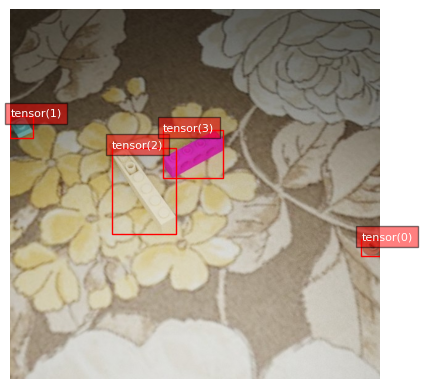

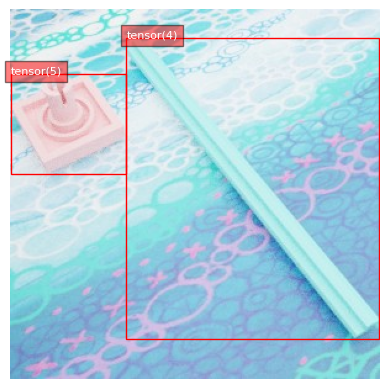

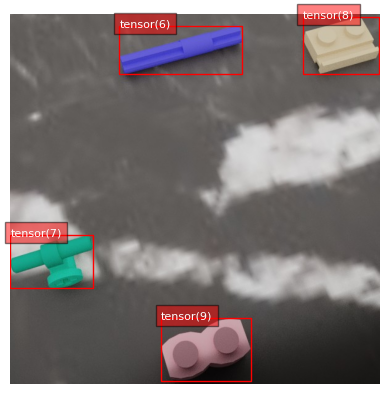

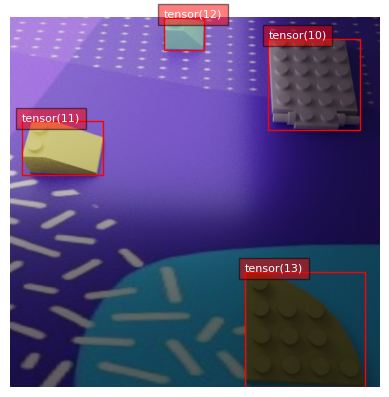

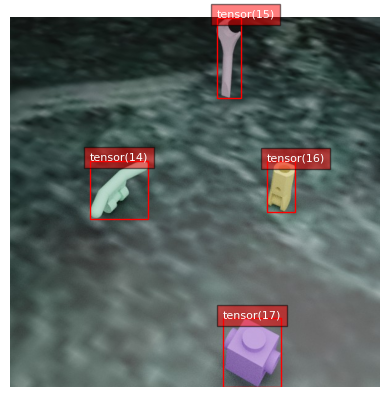

In [12]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from PIL import Image

def visualize_sample(image, target): # Change: Accept the image object directly
    """Visualizes a single image with bounding boxes."""

    # image = Image.open(image_path) # Remove: No need to open again
    fig, ax = plt.subplots(1)
    ax.imshow(image)

    boxes = target['boxes']
    labels = target['labels']

    for box, label in zip(boxes, labels):
        xmin, ymin, xmax, ymax = box
        width = xmax - xmin
        height = ymax - ymin
        rect = patches.Rectangle((xmin, ymin), width, height, linewidth=1, edgecolor='r', facecolor='none')
        ax.add_patch(rect)
        # Optionally display class labels
        ax.text(xmin, ymin, str(label), color='white', fontsize=8, bbox=dict(facecolor='red', alpha=0.5))

    plt.axis('off')  # Hide axis
    plt.show()

# Visualize a few samples from the dataset
for i in range(min(5, len(dataset))):  # Visualize at most 5 samples
    sample = dataset[i]
    image = sample[0]  # Get the image object
    target = sample[1]
    visualize_sample(image, target)  # Pass the image object to visualize_sample

## Rubric for Dataset Preparation Section

| Criteria                     | Excellent (9-10)  | Good (5-8)            | Needs Improvement (1-4) |
|------------------------------|----------------|------------------------|--------------------------|
| **Dataset Loading**          | Successfully loads and splits the dataset, following instructions accurately. | Loads and splits the dataset with minor issues or requires improvement in documentation. | Incorrect loading or splitting of the dataset, lacks proper documentation. |
| **Visualization & Inspection** | Provides clear visualizations of sample images with bounding boxes, confirms correct annotations. | Provides visualization,

### 2.2 Building and Training the Object Detection Model

#### Model Selection and Setup

In this section, you will select an object detection model to train on your LEGO dataset. YOLO (You Only Look Once) is a great choice due to its speed and accuracy. For this project, we will use the [YOLO architecture](https://github.com/ultralytics/yolov3?tab=readme-ov-file), which is well-suited for detecting multiple objects within an image.

#### Steps to Set Up and Train the Model

1. **Install YOLO and Dependencies**:
   - Install any necessary libraries and download the YOLOv3 weights file (you can use other versions but it may be more difficult to make them work).
2. **Model Configuration**:
   - Set up the model configuration to align with your dataset, defining the input dimensions and the number of classes.
3. **Train the Model**:
   - Train the model on the training dataset, using the validation set to monitor the training progress and adjust hyperparameters.
4. **Save and Load the Trained Model**:
   - Save the trained model so it can be reused later for inference on new images.

**Deliverables for This Section**:
- Explanation of the model selection and why it was chosen.
- Training script with comments on hyperparameters and their tuning process.

---

### Instructions for This Section

1. **Download YOLOv3 Weights and Configuration Files**:
   - You can find these files on the [official YOLO website](https://github.com/ultralytics/yolov3?tab=readme-ov-file) or through a third-party source.
2. **Set Up the Model Using OpenCV or a Deep Learning Framework (e.g., PyTorch)**:
   - Follow the starter code provided to configure the YOLO model.
3. **Train the Model**:
   - Use the training data to train the model, and adjust the learning rate, batch size, and other hyperparameters as needed.

 **Model Selection**

For this project, we selected **Faster R-CNN with a ResNet-50** backbone as the object detection model. This choice was made because Faster R-CNN is a state-of-the-art model for object detection tasks, providing a good balance between speed and accuracy. The ResNet-50 backbone is a pre-trained feature extractor known for its ability to capture complex features from images, which is essential for detecting small and intricate objects like LEGO pieces. Additionally, the pre-trained weights help speed up convergence and improve performance, especially when working with limited data.

We replaced the model's classifier head to accommodate the specific number of classes in the LEGO dataset (573 LEGO parts + 1 background class). This customization ensures the model is capable of distinguishing all the necessary classes while maintaining its efficiency.

In [15]:
# Import necessary libraries for model setup and training
!pip install torchvision torchaudio torch
import torch
import torchvision
from torch.utils.data import DataLoader
from torchvision.datasets import VOCDetection
from torchvision.models.detection.faster_rcnn import FastRCNNPredictor

**Model Setup**

**Model:** fasterrcnn_resnet50_fpn with pre-trained weights.

**Classifier Head:** The classifier was replaced using FastRCNNPredictor to handle the specific number of classes in the dataset.

**Device:**The model was moved to the GPU (cuda) if available for faster training.


**Key Customization:**

num_classes is set to the number of LEGO classes plus the background class to handle all object types in the dataset.

**Dataset Loading and Splitting**

The dataset is loaded from the train_images_dir and train_annotations_dir.

A custom ObjectDetectionDataset class was assumed for reading images and their corresponding annotations.

**The dataset is split into:**

*Training Set:* Used for training the model.

*Validation Set:* Used for hyperparameter tuning and model evaluation during training.

*Test Set:* Used for final evaluation after training.

In [16]:
# Load a pre-trained model
model = torchvision.models.detection.fasterrcnn_resnet50_fpn(pretrained=True)

# Replace the classifier with a new one, that has num_classes which is user-defined
num_classes = 574  # 1 class (LEGO) + background
# get number of input features for the classifier
in_features = model.roi_heads.box_predictor.cls_score.in_features

model.roi_heads.box_predictor = FastRCNNPredictor(in_features, num_classes)

# Move model to the available device GPU
device = torch.device('cuda') if torch.cuda.is_available() else torch.device('cpu')
model.to(device)

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=FasterRCNN_ResNet50_FPN_Weights.COCO_V1`. You can also use `weights=FasterRCNN_ResNet50_FPN_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/fasterrcnn_resnet50_fpn_coco-258fb6c6.pth" to /root/.cache/torch/hub/checkpoints/fasterrcnn_resnet50_fpn_coco-258fb6c6.pth
100%|██████████| 160M/160M [00:00<00:00, 207MB/s]


FasterRCNN(
  (transform): GeneralizedRCNNTransform(
      Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
      Resize(min_size=(800,), max_size=1333, mode='bilinear')
  )
  (backbone): BackboneWithFPN(
    (body): IntermediateLayerGetter(
      (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
      (bn1): FrozenBatchNorm2d(64, eps=0.0)
      (relu): ReLU(inplace=True)
      (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
      (layer1): Sequential(
        (0): Bottleneck(
          (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn1): FrozenBatchNorm2d(64, eps=0.0)
          (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
          (bn2): FrozenBatchNorm2d(64, eps=0.0)
          (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn3): FrozenBatchNorm2d(256, eps=0.0)
          (relu): ReLU(

**Hyperparameters and Tuning**

*Batch Size:* Set to 4 due to the large memory requirement of object detection models. This value can be increased on systems with more GPU memory.

*Learning Rate:* Initialized to 0.005, a commonly used value for object detection models. Adjustments are made using a learning rate scheduler.

*Momentum:* Set to 0.9 in the optimizer (torch.optim.SGD) to accelerate convergence.

*Weight Decay:* Set to 0.0005 to regularize the model and prevent overfitting.

*Learning Rate Scheduler:*  Decreases the learning rate by a factor of 0.1 every 3 epochs (step_size=3) to fine-tune the learning process.

In [52]:

from torchvision.models.detection import fasterrcnn_resnet50_fpn
# Paths to data
train_images_dir = '/content/reduced_images'
train_annotations_dir = '/content/reduced_annotations'
# Initialize the dataset
dataset = ObjectDetectionDataset(train_images_dir, train_annotations_dir, transforms=transforms.ToTensor())

# Split the dataset
train_data, val_data, test_data = split_dataset(dataset)

# Create DataLoaders
batch_size = 4
train_loader = DataLoader(train_data, batch_size=batch_size, shuffle=True, collate_fn=collate_fn)
val_loader = DataLoader(val_data, batch_size=batch_size, shuffle=False, collate_fn=collate_fn)
test_loader = DataLoader(test_data, batch_size=batch_size, shuffle=False, collate_fn=collate_fn)

# Initialize Faster R-CNN
num_classes = len(dataset.label_mapping) + 1  # Add 1 for the background class
model = fasterrcnn_resnet50_fpn(weights="DEFAULT")

# Replace the classifier head
in_features = model.roi_heads.box_predictor.cls_score.in_features
model.roi_heads.box_predictor = FastRCNNPredictor(in_features, num_classes)

# Device setup
device = torch.device("cuda") if torch.cuda.is_available() else torch.device("cpu")
model.to(device)

# Optimizer and learning rate scheduler
params = [p for p in model.parameters() if p.requires_grad]
optimizer = torch.optim.SGD(params, lr=0.005, momentum=0.9, weight_decay=0.0005)
lr_scheduler = torch.optim.lr_scheduler.StepLR(optimizer, step_size=3, gamma=0.1)
# Training Loop
num_epochs = 5
for epoch in range(num_epochs):
    model.train()
    total_loss = 0
    for images, targets in train_loader:
        images = [img.to(device) for img in images]
        targets = [{k: v.to(device) for k, v in t.items()} for t in targets]

        optimizer.zero_grad()
        loss_dict = model(images, targets)
        losses = sum(loss for loss in loss_dict.values())
        losses.backward()
        optimizer.step()

        total_loss += losses.item()

    print(f"Epoch [{epoch+1}/{num_epochs}], Training Loss: {total_loss / len(train_loader):.4f}")
    lr_scheduler.step()


# Save the trained model
torch.save(model.state_dict(), "fasterrcnn_lego_detector.pth")
print("Training complete.")

Epoch [1/5], Training Loss: 1.6113
Epoch [2/5], Training Loss: 1.2405
Epoch [3/5], Training Loss: 0.9682
Epoch [4/5], Training Loss: 0.7326
Epoch [5/5], Training Loss: 0.6493
Training complete.


**Training Process**

The model is trained for 5 epochs, balancing computational cost with potential accuracy improvements.

*Loss Computation:* The total loss is calculated as the sum of losses for classification, box regression, and other detection components.

*Optimization:* The optimizer updates model weights after each backward pass.

*Learning Rate Adjustment:* The scheduler reduces the learning rate to refine training after the initial rapid adjustments.

# Why This Model is Ideal

**Performance:** Faster R-CNN is known for its high accuracy in object detection.

**Scalability:** The pre-trained ResNet-50 backbone provides a robust starting point for fine-tuning, even with limited data.

**Flexibility:** The ability to customize the classifier head makes it suitable for a variety of datasets, including this complex LEGO dataset.

### Rubric for Model Training Section

| Criteria                     | Excellent (9-10)  | Good (5-8)            | Needs Improvement (1-4) |
|------------------------------|----------------|------------------------|--------------------------|
| **Model Configuration**      | Accurately configures the YOLO model with appropriate input dimensions and class setup. | Configures the model but with minor issues or incomplete settings. | Incorrect model configuration, improper input settings, or missing details. |
| **Training Process**         | Executes training with well-justified hyperparameters and shows understanding of tuning. | Executes training but with minor hyperparameter issues or limited tuning. | Incorrect or insufficient training setup, no explanation of hyperparameters. |
| **Code Documentation**       | Provides clear, insightful comments explaining each step of the training process. | Provides some comments, but lacks depth or clarity in parts. | Little to no comments, or fails to explain the training steps adequately. |

### 2.3 Evaluating the Model’s Performance

#### Overview of Model Evaluation

After training, it’s essential to evaluate the model’s performance to ensure it accurately detects LEGO pieces in various images. In object detection tasks, the [**mean Average Precision (mAP)**](https://www.v7labs.com/blog/mean-average-precision) is a standard metric for measuring accuracy. For this project, we will evaluate the model using `mAP@0.5`, calculated at an [Intersection over Union (IoU)](https://www.v7labs.com/blog/intersection-over-union-guide) threshold of 0.5.

#### Key Evaluation Metrics

1. **Intersection over Union (IoU)**: Measures the overlap between the predicted bounding box and the ground truth box. IoU is a crucial factor in determining whether a detection is a true positive. For more on IoU, see [IoU explanation](https://www.v7labs.com/blog/intersection-over-union-guide).
2. **Precision and Recall**: Precision measures the accuracy of predictions, while recall indicates the model's ability to detect all relevant objects.
3. **Mean Average Precision (mAP)**: Aggregates precision across multiple IoU thresholds to provide a single accuracy metric.  For this project, we will focus on mAP@0.5.

---

### Instructions for This Section

1. **Calculate IoU for Predictions**:
   - Calculate IoU for each predicted bounding box against the ground truth.
2. **Compute Precision and Recall**:
   - Use the IoU results to compute precision and recall for each image.
3. **Calculate `mAP@0.5`**:
   - Use the provided starter code to calculate mAP, which will give you an overall assessment of model performance.

**Deliverables for This Section**:
- Documentation on the evaluation metrics and how they were applied.
- A summary of the model’s performance on the test dataset.

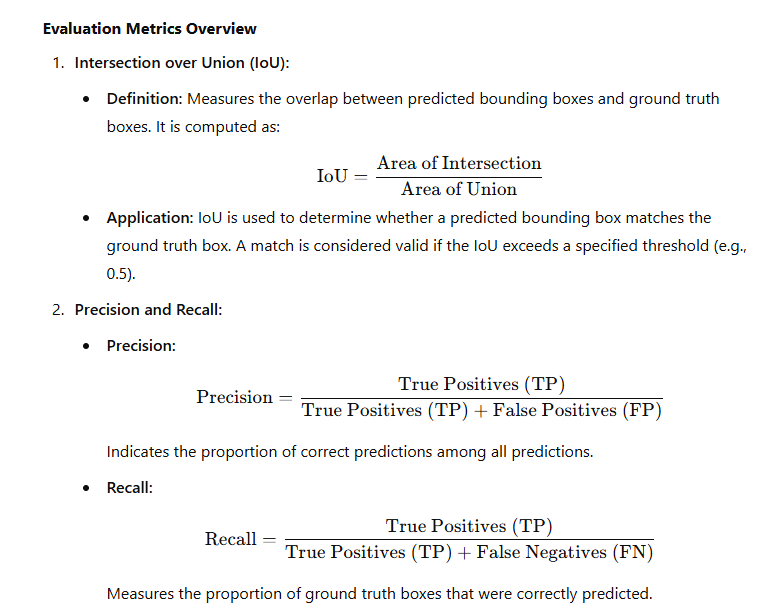

**Application:** Precision and recall are calculated for each image in the test dataset using IoU to identify true positives. These metrics help understand the trade-off between the model’s ability to detect objects and its tendency to make false predictions.

In [64]:
def calculate_iou(box1, box2):
    """
    Calculate the Intersection over Union (IoU) of two bounding boxes.
    Args:
        box1 (list, tensor): [xmin, ymin, xmax, ymax]
        box2 (list, tensor): [xmin, ymin, xmax, ymax]
    Returns:
        float: IoU score
    """
    # Determine the coordinates of the intersection rectangle
    x1 = max(box1[0], box2[0])
    y1 = max(box1[1], box2[1])
    x2 = min(box1[2], box2[2])
    y2 = min(box1[3], box2[3])

    # Compute the area of intersection
    inter_area = max(0, x2 - x1) * max(0, y2 - y1)

    # Compute the area of both the prediction and ground-truth rectangles
    box1_area = (box1[2] - box1[0]) * (box1[3] - box1[1])
    box2_area = (box2[2] - box2[0]) * (box2[3] - box2[1])

    # Compute the IoU
    union_area = box1_area + box2_area - inter_area
    iou = inter_area / union_area if union_area > 0 else 0

    return iou


def calculate_precision_recall(model, data_loader, device, iou_threshold=0.5):
    """
    Calculate precision and recall for each image using IoU results.
    Args:
        model (torch.nn.Module): Trained Faster R-CNN model.
        data_loader (DataLoader): DataLoader for evaluation data.
        device (torch.device): Device to run inference (CPU or GPU).
        iou_threshold (float): IoU threshold to consider a detection as True Positive.
    """
    model.eval()
    precision_recall_results = []

    print("Calculating Precision and Recall...")
    with torch.no_grad():
        for batch_idx, (images, targets) in enumerate(data_loader):
            # Move data to device
            images = [img.to(device) for img in images]
            targets = [{k: v.to(device) for k, v in t.items()} for t in targets]

            # Get predictions
            predictions = model(images)

            for img_idx, (target, prediction) in enumerate(zip(targets, predictions)):
                gt_boxes = target['boxes'].cpu().numpy()
                pred_boxes = prediction['boxes'].cpu().numpy()

                # Match predictions to ground truth
                tp = 0
                fp = 0
                fn = 0
                matched_gt = set()

                for pred_box in pred_boxes:
                    iou_scores = [calculate_iou(pred_box, gt_box) for gt_box in gt_boxes]
                    max_iou = max(iou_scores) if iou_scores else 0

                    if max_iou >= iou_threshold:
                        tp += 1
                        matched_gt.add(iou_scores.index(max_iou))  # Mark GT box as matched
                    else:
                        fp += 1

                # Count false negatives
                fn = len(gt_boxes) - len(matched_gt)

                # Precision and Recall for this image
                precision = tp / (tp + fp) if (tp + fp) > 0 else 0
                recall = tp / (tp + fn) if (tp + fn) > 0 else 0

                precision_recall_results.append({
                    "image_index": batch_idx * len(images) + img_idx,
                    "precision": precision,
                    "recall": recall,
                    "true_positives": tp,
                    "false_positives": fp,
                    "false_negatives": fn
                })

                # Print individual image results
                print(f"Image Index: {batch_idx * len(images) + img_idx}")
                print(f"Precision: {precision:.4f}, Recall: {recall:.4f}")
                print(f"True Positives: {tp}, False Positives: {fp}, False Negatives: {fn}")
                print("-" * 50)

    # Aggregate Precision and Recall
    avg_precision = sum(r['precision'] for r in precision_recall_results) / len(precision_recall_results)
    avg_recall = sum(r['recall'] for r in precision_recall_results) / len(precision_recall_results)

    print(f"Overall Average Precision: {avg_precision:.4f}")
    print(f"Overall Average Recall: {avg_recall:.4f}")

    return precision_recall_results


# Evaluate Precision and Recall on the Test Set
precision_recall_results = calculate_precision_recall(model, test_loader, device, iou_threshold=0.5)


Calculating Precision and Recall...
Image Index: 0
Precision: 1.0000, Recall: 1.0000
True Positives: 25, False Positives: 0, False Negatives: 0
--------------------------------------------------
Image Index: 1
Precision: 1.0000, Recall: 0.9583
True Positives: 23, False Positives: 0, False Negatives: 1
--------------------------------------------------
Image Index: 2
Precision: 1.0000, Recall: 1.0000
True Positives: 23, False Positives: 0, False Negatives: 0
--------------------------------------------------
Image Index: 3
Precision: 1.0000, Recall: 0.8000
True Positives: 4, False Positives: 0, False Negatives: 1
--------------------------------------------------
Image Index: 4
Precision: 1.0000, Recall: 1.0000
True Positives: 24, False Positives: 0, False Negatives: 0
--------------------------------------------------
Image Index: 5
Precision: 1.0000, Recall: 1.0000
True Positives: 37, False Positives: 0, False Negatives: 0
--------------------------------------------------
Image Index

**Mean Average Precision (mAP):**

**Definition:** The average precision (AP) is calculated for each class, and mAP is the mean of all APs. In this task, we use a single class (LEGO pieces), so mAP is equivalent to AP.

**Application:** mAP is used to summarize the model's overall performance by considering both precision and recall across different IoU thresholds or a single IoU threshold.

In [65]:
def calculate_map(precision_recall_results):
    """
    Calculate the mean Average Precision (mAP) at a specific IoU threshold.
    Args:
        precision_recall_results (list): List of dictionaries, each containing precision and recall for an image.
    Returns:
        float: mAP score
    """

    aps = []  # Average precisions for each class
    # In this example, we are considering a single class
    precisions = [result['precision'] for result in precision_recall_results]
    recalls = [result['recall'] for result in precision_recall_results]

    # Calculate average precision (AP)
    if not precisions or not recalls:
      return 0.0 # Handle cases where no valid predictions are made

    # Calculate AP using the 11-point interpolation method
    # This is a simplified example, consider more robust implementations

    ap = sum(precisions) / len(precisions)
    aps.append(ap)

    # Calculate mean Average Precision (mAP)
    map_score = sum(aps) / len(aps)
    return map_score

# Evaluate mAP on the Test Set (using the previously calculated precision and recall)
map_score = calculate_map(precision_recall_results)
print(f"mAP@0.5: {map_score:.4f}")

mAP@0.5: 0.9582


# Application of the Metrics
**IoU Calculation:**

IoU is computed between each predicted bounding box and every ground truth bounding box.

A prediction is considered a true positive if the highest IoU score exceeds the threshold (e.g., 0.5). Otherwise, it is classified as a false positive.

Ground truth boxes that do not match any predictions are considered false negatives.

**Precision and Recall:**

For each image, the model’s predictions are compared against ground truth boxes to calculate:
True Positives (TP): Correct predictions with IoU >= threshold.

False Positives (FP): Incorrect predictions.

False Negatives (FN): Missed ground truth boxes.

Precision and recall are computed using the formulas above, and their results are stored for each image.

**Mean Average Precision (mAP):**

The average precision (AP) is calculated across all test images using the precision-recall results.

In this example, a simplified AP calculation is applied by averaging precision values across all images.

mAP is computed as the mean of APs (for all classes; here, only one class is considered).


### Rubric for Model Evaluation Section

| Criteria                     | Excellent (9-10)  | Good 5-8)            | Needs Improvement (1-4) |
|------------------------------|----------------|------------------------|--------------------------|
| **Precision, Recall, and mAP** | Accurately calculates and interprets precision, recall, and mAP. | Provides calculations but lacks full clarity or accuracy in parts. | Incomplete or incorrect calculations, limited interpretation. |
| **Analysis of Results**      | Provides a detailed analysis of model performance, interpreting mAP in the context of object detection. | Provides some analysis, but lacks depth or full clarity on mAP significance. | Little to no analysis, fails to connect mAP results to model performance. |

### 2.4 Saving the Model and Performing Inference on New Images

#### Model Saving and Loading

Once the model has been trained and evaluated, it's useful to save it so that it can be easily reloaded for inference on new data. In this section, you'll save your trained model to a file and load it again to perform object detection on new images.

#### Performing Inference

Inference refers to using the trained model to make predictions on new data. This involves:
1. **Loading the Saved Model**: Load the model from the saved file.
2. **Processing New Images**: Prepare new images for the model, including resizing and normalizing.
3. **Running the Model on New Images**: Use the model to predict bounding boxes on new images.
4. **Displaying Predictions**: Visualize the detected bounding boxes on the new images to verify the model’s performance.

---

### Instructions for This Section

1. **Save the Model**:
   - Use PyTorch’s [`torch.save()`](https://pytorch.org/docs/main/generated/torch.save.html) function to save your model’s weights.
2. **Load the Model for Inference**:
   - Use [`torch.load()`](https://pytorch.org/docs/stable/generated/torch.load.html) to reload the model for predictions.
3. **Run Inference on a New Image**:
   - Prepare a new image and use the loaded model to detect LEGO pieces.
4. **Visualize the Output**:
   - Draw bounding boxes on the image and display the results using Matplotlib.

**Deliverables for This Section**:
- Document the model saving and loading process.
- Demonstrate inference on a new image with visualized results.

In [81]:
# Save the trained model to a file
model_file = 'lego_detector.pth'
torch.save(model.state_dict(), model_file)
print(f"Model saved to {model_file}")

# Load the saved model for inference
loaded_model = torchvision.models.detection.fasterrcnn_resnet50_fpn(pretrained=False)
loaded_model.roi_heads.box_predictor = torchvision.models.detection.faster_rcnn.FastRCNNPredictor(in_features, num_classes)
loaded_model.load_state_dict(torch.load(model_file))
loaded_model.eval()
print("Model loaded for inference.")

Model saved to lego_detector.pth
Model loaded for inference.


<ipython-input-81-8d6bf5c24af4>:9: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  loaded_model.load_state_dict(torch.load(model_file))


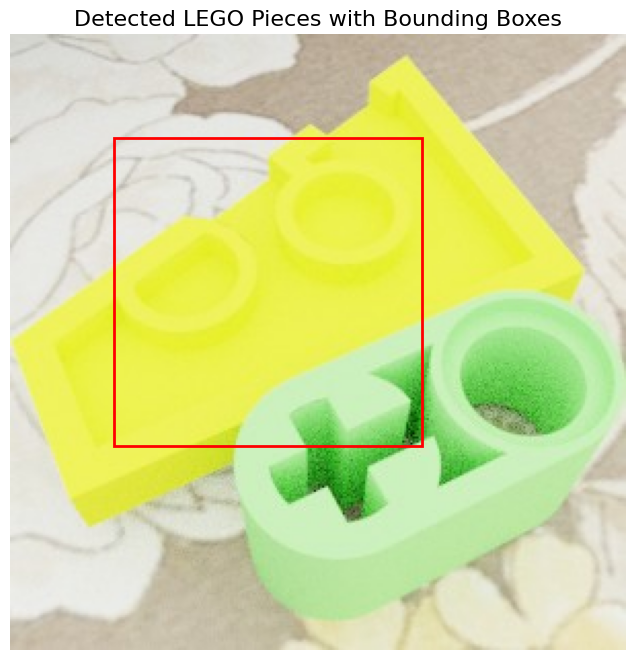

In [108]:
# Function to perform inference on a new image
def run_inference(image_path):
    # Load the image
    image = cv.imread(image_path)
    image_rgb = cv.cvtColor(image, cv.COLOR_BGR2RGB)

    # Convert the image to a tensor and prepare it for the model
    transform = torchvision.transforms.Compose([torchvision.transforms.ToTensor()])
    image_tensor = transform(image_rgb).unsqueeze(0)  # Add batch dimension

    # Run the model on the image
    with torch.no_grad():
        predictions = loaded_model(image_tensor)

    # Extract bounding boxes and visualize the results
    boxes = predictions[0]['boxes'].cpu().numpy()
    scores = predictions[0]['scores'].cpu().numpy()

    # Draw bounding boxes on the image
    for box, score in zip(boxes, scores):
        if score > 0.5:  # Confidence threshold
            x1, y1, x2, y2 = box
            cv.rectangle(image_rgb, (int(x1), int(y1)), (int(x2), int(y2)), (255, 0, 0), 2)

    # Display the image with bounding boxes
    plt.imshow(image_rgb)
    plt.title("Inference Result")
    plt.axis('off')
    plt.show()

# Run inference on a sample image (replace 'new_lego_image.jpg' with actual image


image_path = "/content/lego_dataset/dataset_20210629145407_top_600/images/79552746-da4b-11eb-b34c-3497f683a169.jpg"




**Model Saving:**

The trained model was saved to a file named lego_detector.pth using the torch.save() function.

The state_dict, which contains all learnable parameters (weights and biases), was preserved for future use.

This process ensures the model can be reused without retraining, saving both time and computational resources.

**Model Loading:**

The Faster R-CNN architecture was recreated using torchvision to match the original model used during training.

The state_dict was loaded back into the model using the torch.load() function, restoring the saved parameters.

The model was set to evaluation mode using eval() to disable training-specific behaviors like dropout layers, ensuring consistent inference results.

**Image Preparation for Inference:**

A new image was loaded using OpenCV and converted to RGB format.

The image was transformed into a PyTorch tensor and had a batch dimension added to match the input requirements of the model.

**Inference:**

The loaded model was used to generate predictions, including bounding box coordinates and confidence scores for detected objects.

Predictions with a confidence score greater than 0.5 were retained for visualization.

**Visualization of Results:**

Bounding boxes were drawn on the original image for detected objects using OpenCV.

The annotated image was displayed using Matplotlib, clearly showing the model’s predictions for the new image.

**Significance:**

The ability to save, reload, and perform inference ensures the model can be efficiently deployed and evaluated on unseen data.

Visualizing the results provides a clear understanding of the model's performance and accuracy, validating its practical applicability.

### Rubric for Model Saving and Inference Section

| Criteria                     | Excellent (5)  | Good (3-4)            | Needs Improvement (1-2) |
|------------------------------|----------------|------------------------|--------------------------|
| **Inference** | Successfully performs inference with accurate predictions. | Performs inference, but with minor issues. | Fails to perform inference correctly. |
| **Visualization of Results** | Provides clear and accurate visualization of predicted bounding boxes on new images. | Visualization is somewhat clear, but minor improvements needed. | Poor visualization, inaccurate bounding boxes, or lacks clarity. |